# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500,
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1,
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
#     df.to_csv('pca-dataset.csv', index=False)
    return df

df = generate_data()

In [4]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [6]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

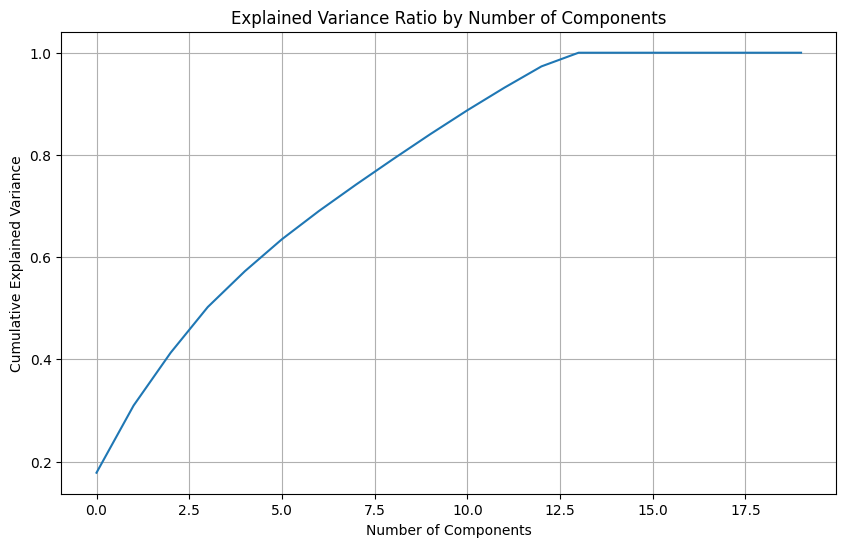

In [8]:
# insert code here
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Split into features and target
X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Perform PCA
pca = PCA()
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()


> Describe your results here

From the plot, it appears that around 12 components explain the majority of the variance in the data while additional components contribute minimally to the total explained variance. Therefore, I would recommend reducing the data to approximately 12 components based on this analysis.

Reducing the data to 12 components would retain most of the information while reducing the dimensionality significantly, which can lead to simpler and more interpretable models with potentially improved generalization performance.








<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell.

In [11]:
# Insert code here

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.8133333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


> Describe your results here

I would use accuracy, and it is about 81%

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [13]:
# Insert code here

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train_scaled, y_train)


y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.7033333333333334
Precision: 0.7040254342431762
Recall: 0.7033333333333334


> Describe results here


Based on the results, the metrics are decent and the logistic model can be used for evaluation.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [15]:
# Insert code
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Define the pipeline with PCA and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])


pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.69
Precision: 0.6872885414018138
Recall: 0.69


> Describe your results here

In this case, the results are better without using the pipeline for logistic regression.


# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [16]:
# Insert code here

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)


y_pred = clf.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6766666666666666
Precision: 0.6888600951338245
Recall: 0.6766666666666666


> Describe your results here.

The decision tree model has slightly low accuracy than the two logistic regression models, so I would still recommend the original logistic regression model.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [17]:
# Insert code here

# Define the pipeline with PCA and Decision Tree
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),  # Setting the number of components based on previous analysis
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6266666666666667
Precision: 0.633530103965741
Recall: 0.6266666666666667


> Describe results here

Decision trees with PCA has the lowest accuracy amongst the other models.
I think it is not a good fit for this data generated. The original logistic regression method is recommended for this data.